In [39]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [40]:
class AgentState(TypedDict):
    name: str
    age: str
    skills:List[str]
    final: str

In [41]:
def first_node(state:AgentState) -> AgentState:
    """
    """
    state['final'] = f"Hi! {state['name']}"
    return state

def second_node(state:AgentState) -> AgentState:
    """"""
    state['final'] = state['final'] + f"\nYou are {state['age']} years old."
    return state

def third_node(state:AgentState) -> AgentState:
    """"""
    state['final'] += f"\nYou have the following skills :"
    for s in state['skills']:
        state['final'] += s + " "
    state['final'] += "."
    return state

In [42]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")

app= graph.compile()

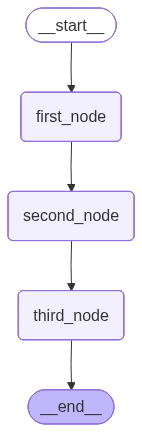

In [43]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
res = app.invoke({"name":"Steve", "age":"45", "skills":["Python", "Java"]}) # type: ignore

In [45]:
print(res['final'])

Hi! Steve
You are 45 years old.
You have the following skills :Python Java .
